In [1]:
import os, torch, cv2, numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms as T

/home/ubuntu/anaconda3/envs/speed/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
tr_val = ["train", "valid", "test"]

for tr in tr_val:
    im_paths = glob(f"/mnt/data/dataset/bekhzod/im_class/korean_landmarks/kts/{tr}/*/*/images/*")
    print(f"{tr} dataset has {len(im_paths)} images!")

train dataset has 7000 images!
valid dataset has 1000 images!
test dataset has 2000 images!


In [23]:
class CustomDataset(Dataset):
    
    def __init__(self, root = "/mnt/data/dataset/bekhzod/im_class/korean_landmarks/kts/", tr_val = "train", transformations = None):
        super().__init__()
        
        self.im_paths = sorted(glob(f"{root}{tr_val}/*/*/images/*.jpg"))
        self.transformations = transformations
        
        self.classes = {}
        cls_count = 0
        for idx, im_path in enumerate(self.im_paths):
            gt = self.get_label(im_path)
            if gt not in self.classes: self.classes[gt] = cls_count; cls_count += 1
        
    def __len__(self): return len(self.im_paths)

    def get_label(self, path): return path.split("/")[-3]

    def get_info(self): return {v: k for k, v in self.classes.items()}, len(self.classes)

    def __getitem__(self, idx):
        
        im_path = self.im_paths[idx]
        im = Image.open(im_path)
        gt = self.classes[self.get_label(im_path)]
        if self.transformations: im = self.transformations(im)
        
        return im, gt

tfs = T.Compose([T.Resize(224), T.ToTensor()])
ds = CustomDataset(transformations = tfs)
ds[2399][1]

3

In [24]:
classes, num_cls = ds.get_info()
print(classes, num_cls)

{0: 'beach', 1: 'cave', 2: 'island', 3: 'lake', 4: 'mountain', 5: 'amusement park', 6: 'palace', 7: 'park', 8: 'restaurant', 9: 'tower'} 10


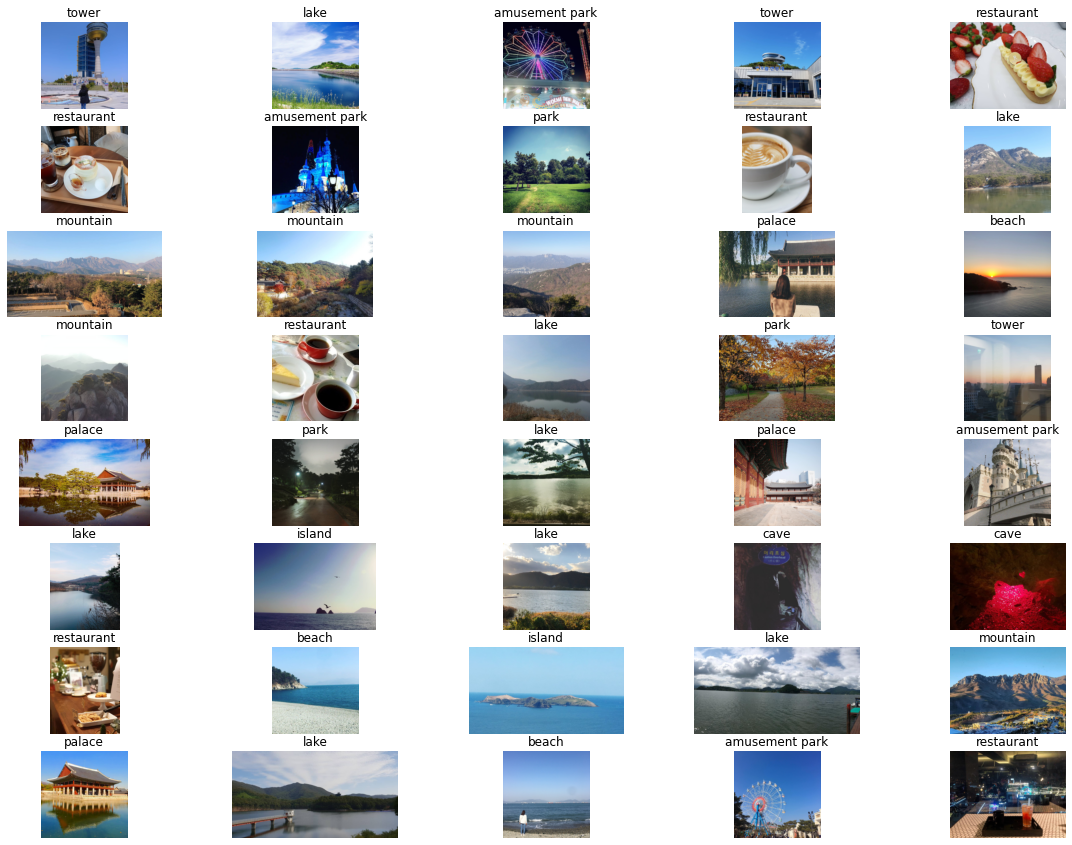

In [35]:
def visualize(ds, classes, num_ims = 40, rows = 8):
    import random
    from utils import tn2np
    from matplotlib import pyplot as plt

    
    indices = [random.randint(0, len(ds)) for _ in range(num_ims)]
    plt.figure(figsize = (20, 15))
    for idx, index in enumerate(indices):
        im, gt = ds[index]
        plt.subplot(rows, num_ims // rows, idx + 1)
        plt.imshow(tn2np(im))
        plt.axis("off")
        plt.title(f"{classes[gt]}")
        
visualize(ds = ds, classes = classes)    